Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)        

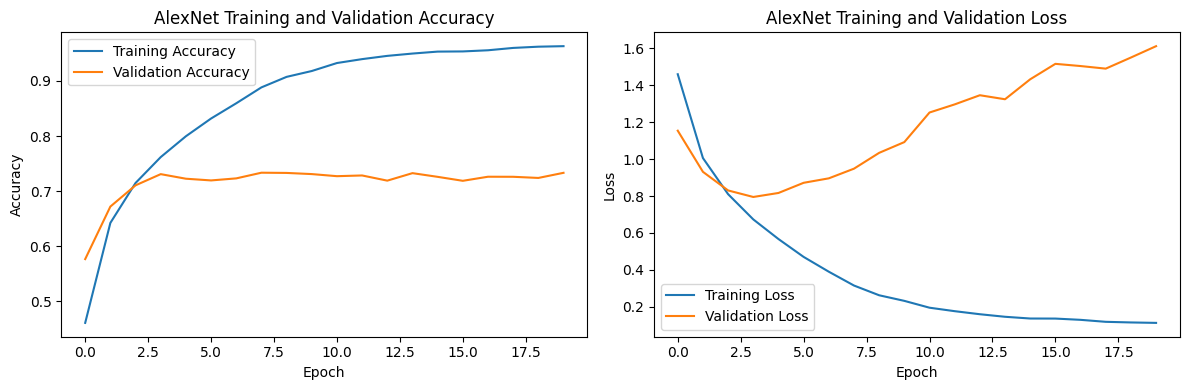

In [6]:
################### Problem 1 - AlexNet  ############################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def AlexNet(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Assuming input shape for CIFAR-10 is (32, 32, 3)
input_shape = (32, 32, 3)
num_classes = 10

# Create an instance of SimpleAlexNet
model = AlexNet(input_shape, num_classes)

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Model evaluation on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
print(f'Model Training accuracy: {training_accuracy}, Test accuracy: {test_accuracy}, Validation accuracy: {validation_accuracy}')

# Plot the training history (accuracy and loss) for ResNet-11
plt.figure(figsize=(12, 4))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('AlexNet Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('AlexNet Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)         

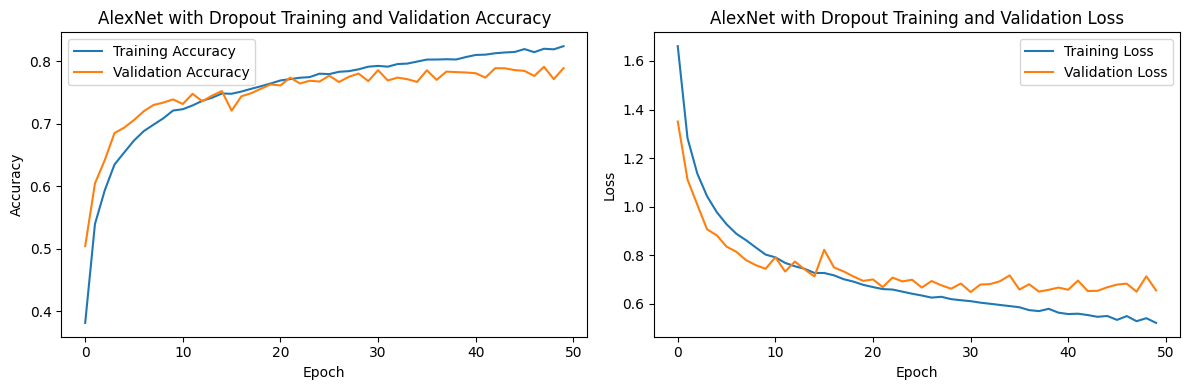

In [5]:
############# Problem 1 - AlexNet + Dropout ##########################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def AlexNet_with_Dropout(input_shape, num_classes):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
    model.add(Conv2D(128, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten layer
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Assuming input shape for CIFAR-10 is (32, 32, 3)
input_shape = (32, 32, 3)
num_classes = 10

# Create an instance of SimpleAlexNet
model = AlexNet_with_Dropout(input_shape, num_classes)

# Print model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Model evaluation on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
print(f'Model Training accuracy: {training_accuracy}, Test accuracy: {test_accuracy}, Validation accuracy: {validation_accuracy}')

# Plot the training history (accuracy and loss) for ResNet-11
plt.figure(figsize=(12, 4))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('AlexNet with Dropout Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('AlexNet with Dropout Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                       

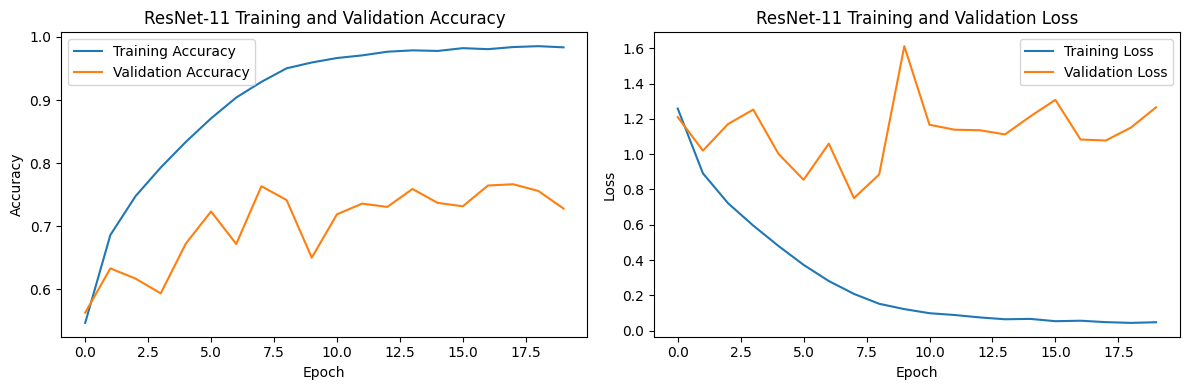

In [1]:
########################### Problem 2 - RESNET 11 ##############################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_resnet11():
    model = models.Sequential()

    # Initial convolutional layer
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Residual blocks
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Global average pooling and dense layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create ResNet-11 model
resnet11_model = build_resnet11()

# Compile the model
resnet11_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display model summary
resnet11_model.summary()

# Train the model
history_resnet11 = resnet11_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Model evaluation on the test set
test_loss_resnet11, test_accuracy_resnet11 = resnet11_model.evaluate(x_test, y_test, verbose=2)
training_accuracy_resnet11 = history_resnet11.history['accuracy'][-1]
validation_accuracy_resnet11 = history_resnet11.history['val_accuracy'][-1]
print(f'Model Training accuracy: {training_accuracy_resnet11}, Test accuracy: {test_accuracy_resnet11}, Validation accuracy: {validation_accuracy_resnet11}')

# Plot the training history (accuracy and loss) for ResNet-11
plt.figure(figsize=(12, 4))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet11.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet11.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ResNet-11 Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet11.history['loss'], label='Training Loss')
plt.plot(history_resnet11.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet-11 Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                    

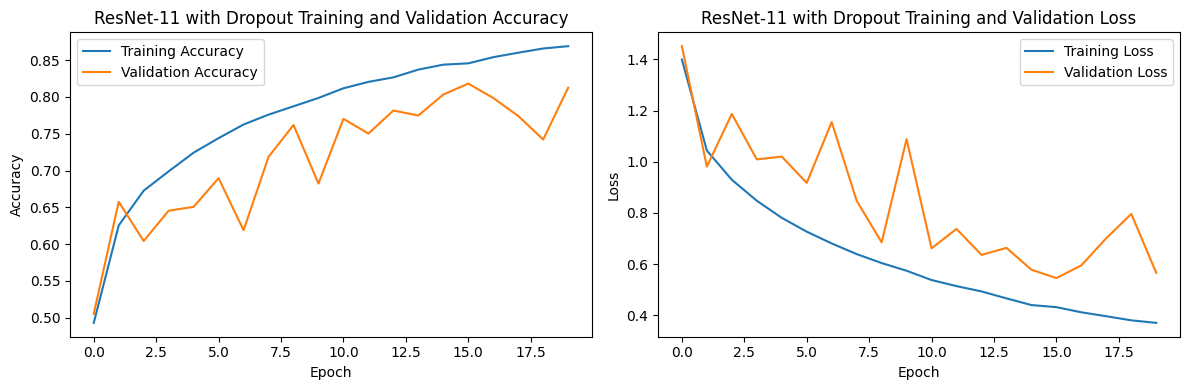

In [3]:
##################### Problem 2 - RESNET 11 + Dropout ##########################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_resnet11_with_dropout(dropout_rate=0.3):
    model = models.Sequential()

    # Initial convolutional layer
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    # Residual blocks
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    # Global average pooling and dense layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create ResNet-11 model with dropout
resnet11_model_with_dropout = build_resnet11_with_dropout()

# Compile the model
resnet11_model_with_dropout.compile(optimizer='adam',
                                    loss='categorical_crossentropy',
                                    metrics=['accuracy'])

# Display model summary
resnet11_model_with_dropout.summary()

# Train the model
history_resnet11_with_dropout = resnet11_model_with_dropout.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Model evaluation on the test set
test_loss_resnet11_with_dropout, test_accuracy_resnet11_with_dropout = resnet11_model_with_dropout.evaluate(x_test, y_test, verbose=2)
training_accuracy_resnet11_with_dropout = history_resnet11_with_dropout.history['accuracy'][-1]
validation_accuracy_resnet11_with_dropout = history_resnet11_with_dropout.history['val_accuracy'][-1]
print(f'Model Training accuracy: {training_accuracy_resnet11_with_dropout}, Test accuracy: {test_accuracy_resnet11_with_dropout}, Validation accuracy: {validation_accuracy_resnet11_with_dropout}')

# Plot the training history (accuracy and loss) for ResNet-11 with dropout
plt.figure(figsize=(12, 4))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_resnet11_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_resnet11_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ResNet-11 with Dropout Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_resnet11_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_resnet11_with_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet-11 with Dropout Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_15 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_16 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_16 (Activation)  (None, 32, 32, 64)       

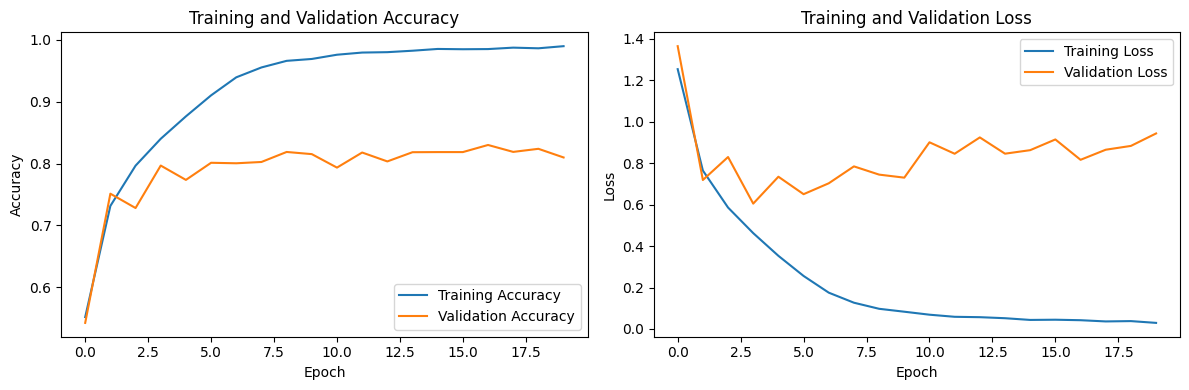

In [4]:
########################## Problem 2 - RESNET 18  ##############################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define ResNet-18 model in TensorFlow
def build_resnet18():
    model = models.Sequential()

    # Initial convolutional layer
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    # Residual blocks
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    model.add(layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Global average pooling and dense layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create ResNet-18 model
resnet18_model = build_resnet18()

# Compile the model
resnet18_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


# Display model summary
resnet18_model.summary()

# Train the model
history = resnet18_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Model evaluation on the test set
test_loss, test_accuracy = resnet18_model.evaluate(x_test, y_test, verbose=2)
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
print(f'Model Training accuracy: {training_accuracy}, Test accuracy: {test_accuracy}, Validation accuracy: {validation_accuracy}')

# Plot the training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_24 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_24 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_25 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                    

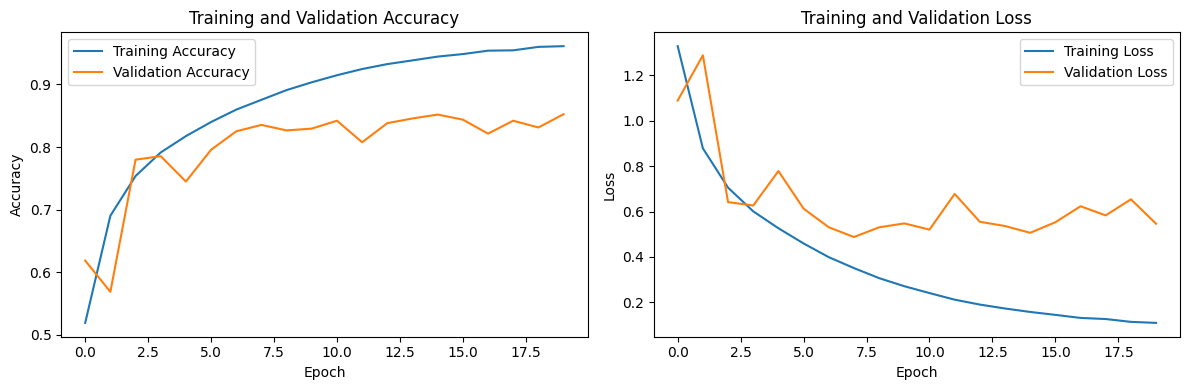

In [5]:
##################### Problem 2 - RESNET 18 + Dropout ##########################
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# Define ResNet-18 model in TensorFlow
def build_resnet18(dropout_rate = 0.2):
    model = models.Sequential()

    # Initial convolutional layer
    model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    # Residual blocks
    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(64, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(128, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(256, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(512, (3, 3), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Conv2D(512, (3, 3), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(dropout_rate))

    # Global average pooling and dense layer
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Create ResNet-18 model
resnet18_model = build_resnet18()

# Compile the model
resnet18_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


# Display model summary
resnet18_model.summary()

# Train the model
history = resnet18_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Model evaluation on the test set
test_loss, test_accuracy = resnet18_model.evaluate(x_test, y_test, verbose=2)
training_accuracy = history.history['accuracy'][-1]
validation_accuracy = history.history['val_accuracy'][-1]
print(f'Model Training accuracy: {training_accuracy}, Test accuracy: {test_accuracy}, Validation accuracy: {validation_accuracy}')

# Plot the training history (accuracy and loss)
plt.figure(figsize=(12, 4))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()